## Naive Bayes Classifier


Text data is usually represented as strings, which in turn are concatenation of characters. The type and length of text will vary accross projects.

Due to it's nature, text is clearly very different from the numeric features and we will need to process it differently before we can do analysis with it and apply our machine learning algorithms to it. 

This notebook will cover the Naive Bayes Classifier that is one of the best ML techniques we can apply to labelled text data.

In [1]:
pwd

'/Users/mucoa/Dropbox/Mac (2)/Desktop/FROGEE/code/day2'

In [2]:
file=open('../../input/smsspamcollection/SMSSpamCollection', encoding="utf-8").readlines()[0:5]

In [3]:
file

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [4]:
#now open the same file in pandas
import pandas as pd
data = pd.read_csv('../../input/smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
data['length'] = data['message'].apply(len)

In [10]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
data.length

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: length, Length: 5572, dtype: int64

<AxesSubplot:ylabel='Frequency'>

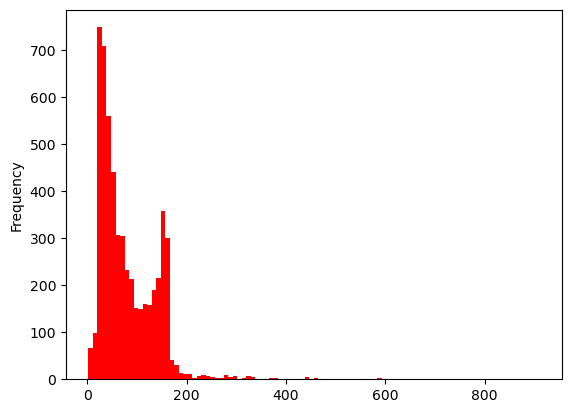

In [12]:
data['length'].plot(bins=100, kind='hist', color='red')

In [13]:
data['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
#910 characters, let's see how this looks like, use .iloc[0] to show full message
data[data['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

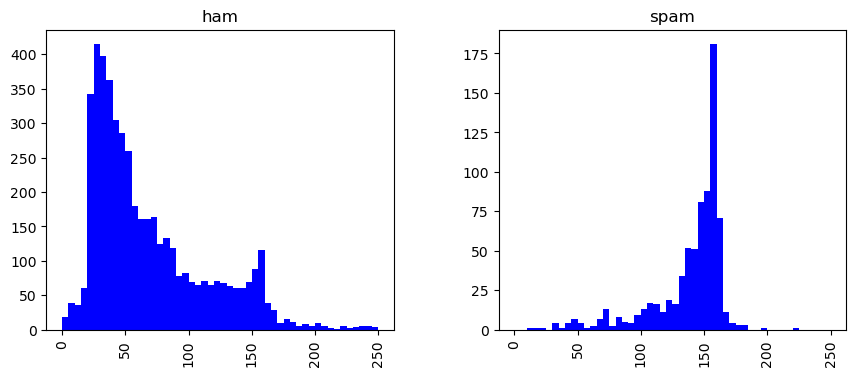

In [15]:
data.hist(column='length', by='label',color='blue', bins=50, figsize=(10,4), range=[0, 250])

## Text Pre-Processing

The classification algorithms need numerical feature vector in order to perform the classification task. 
There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. 

### Bag of Words Approach (BOW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). When using this representation, we discard most of the structure of the input text and count the frequency of each word in the text. Disregarding the structure and counting only word occurrences leads to the
mental image of representing text as a `bag`. 

Computing the bag-of-words representation for a corpus of documents
consists of the following three steps: 

i) Tokenization: Split each document into the words `tokens`, for example by splitting them on whitespace and
punctuation.

ii) Vocabulary building:  Collect a vocabulary of all words that appear
in any of the documents

iii) Encoding: For each document, we count how many times each word appears.


For this purpose, we will use the NLTK library (alternatively you can load the stopwords list that I have provided you with). 
NLTK library, jointly with Spacy, are standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

In [16]:
#!conda install nlkt
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words('english')# Show the vector of stop words

[nltk_data] Downloading package stopwords to /Users/mucoa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
#Alternatively 
stopwords=open('../../input/nltk_stopwords.txt').readlines()

In [18]:
stopwords

['i\n',
 'me\n',
 'my\n',
 'myself\n',
 'we\n',
 'our\n',
 'ours\n',
 'ourselves\n',
 'you\n',
 "you're\n",
 "you've\n",
 "you'll\n",
 "you'd\n",
 'your\n',
 'yours\n',
 'yourself\n',
 'yourselves\n',
 'he\n',
 'him\n',
 'his\n',
 'himself\n',
 'she\n',
 "she's\n",
 'her\n',
 'hers\n',
 'herself\n',
 'it\n',
 "it's\n",
 'its\n',
 'itself\n',
 'they\n',
 'them\n',
 'their\n',
 'theirs\n',
 'themselves\n',
 'what\n',
 'which\n',
 'who\n',
 'whom\n',
 'this\n',
 'that\n',
 "that'll\n",
 'these\n',
 'those\n',
 'am\n',
 'is\n',
 'are\n',
 'was\n',
 'were\n',
 'be\n',
 'been\n',
 'being\n',
 'have\n',
 'has\n',
 'had\n',
 'having\n',
 'do\n',
 'does\n',
 'did\n',
 'doing\n',
 'a\n',
 'an\n',
 'the\n',
 'and\n',
 'but\n',
 'if\n',
 'or\n',
 'because\n',
 'as\n',
 'until\n',
 'while\n',
 'of\n',
 'at\n',
 'by\n',
 'for\n',
 'with\n',
 'about\n',
 'against\n',
 'between\n',
 'into\n',
 'through\n',
 'during\n',
 'before\n',
 'after\n',
 'above\n',
 'below\n',
 'to\n',
 'from\n',
 'up\n',
 'dow

In [19]:
stopwords=[element.replace("\n", "") for element in stopwords]

In [20]:
stopwords[0:3]

['i', 'me', 'my']

In [21]:
import re

In [22]:
#https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

In [23]:
string_original = "string. With. Punctuation?"
string_replaced = re.sub(r'\W',' ', string_original)

In [24]:
string_replaced

'string  With  Punctuation '

In [25]:
def remove_punct_tokenize(text):
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()   
    return text.split()  

Reminder 1:  `\w` means alphanumeric `[0-9a-zA-Z_]`, `\W` = non-alphanumeric, and `\s` stands for empty space. See http://www.pyregex.com/

Reminder 2: You can also use the NLKT library to do the tokenization.

Let's check what we have done.

In [26]:
remove_punct_tokenize("let's try this one....")

['lets', 'try', 'this', 'one']

In [27]:
def remove_stopwords(text):
    clean_stopwords=""
    for element in remove_punct_tokenize(text):
        if element not in stopwords:
            clean_stopwords = clean_stopwords + " "+ element
    return clean_stopwords.strip()

In [28]:
remove_stopwords("let's try this one....")

'lets try one'

In [29]:
data['message'].apply(remove_stopwords).head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: message, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
#CountVectorizer will convert text into token counts
bow_transformer = CountVectorizer()

In [32]:
bow_transformer

CountVectorizer()

In [33]:
bow_transformer = CountVectorizer(preprocessor = remove_stopwords).fit(data['message'])

In [34]:
bow_transformer

CountVectorizer(preprocessor=<function remove_stopwords at 0x7f9ba0078c10>)

In [35]:
dir(bow_transformer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',

In [36]:
print (len(bow_transformer.vocabulary_))

9423


In [37]:
message9 = data['message'][8]

In [38]:
message9

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [39]:
bow9 = bow_transformer.transform([message9])
print (bow9.shape)

(1, 9423)


In [40]:
bow9

<1x9423 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [41]:
type(bow9)

scipy.sparse._csr.csr_matrix

In [42]:
print(bow9)

  (0, 217)	1
  (0, 324)	1
  (0, 905)	1
  (0, 1941)	1
  (0, 2218)	2
  (0, 2279)	1
  (0, 2565)	1
  (0, 4235)	1
  (0, 4795)	1
  (0, 5750)	1
  (0, 6590)	1
  (0, 6827)	1
  (0, 6998)	1
  (0, 7266)	1
  (0, 8763)	1
  (0, 8767)	1
  (0, 9092)	1


Let's check what tokens are stored in (0, 217), (0, 2218)

In [43]:
print (len(bow_transformer.get_feature_names_out()))

9423


In [44]:
print (bow_transformer.get_feature_names_out()[217])

09061701461


In [45]:
print (bow_transformer.get_feature_names_out()[2218])

claim


In [46]:
data[data['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [47]:
message_romeo = data['message'][1085]

In [48]:
message_romeo

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [49]:
bow_romeo = bow_transformer.transform([message_romeo])

In [50]:
bow_romeo.shape

(1, 9423)

In [51]:
print (bow_romeo)

  (0, 1161)	1
  (0, 1230)	2
  (0, 1313)	2
  (0, 1383)	1
  (0, 1556)	2
  (0, 1810)	1
  (0, 2160)	1
  (0, 2314)	1
  (0, 2495)	1
  (0, 2527)	1
  (0, 2559)	1
  (0, 2638)	2
  (0, 2914)	1
  (0, 2956)	1
  (0, 3120)	2
  (0, 3210)	4
  (0, 3369)	1
  (0, 3399)	1
  (0, 3445)	1
  (0, 3738)	1
  (0, 3761)	1
  (0, 3768)	1
  (0, 3795)	1
  (0, 3996)	1
  (0, 4005)	1
  :	:
  (0, 5363)	1
  (0, 5397)	1
  (0, 5565)	1
  (0, 5683)	1
  (0, 5684)	1
  (0, 5725)	1
  (0, 6366)	1
  (0, 6515)	1
  (0, 6639)	1
  (0, 6795)	1
  (0, 7144)	1
  (0, 7185)	1
  (0, 7474)	1
  (0, 7658)	1
  (0, 7805)	3
  (0, 8096)	1
  (0, 8174)	1
  (0, 8227)	1
  (0, 8259)	1
  (0, 8280)	1
  (0, 8282)	1
  (0, 8305)	1
  (0, 8343)	2
  (0, 9056)	1
  (0, 9193)	3


In [52]:
type(bow_transformer.get_feature_names_out())

numpy.ndarray

In [53]:
for index, word in enumerate(bow_transformer.get_feature_names_out()):
    if "love" in word:
        print (index, word)

489 2daylove
937 aathilove
1572 bedroomlove
1602 beloved
1990 canlove
2257 clover
2956 dreamlove
4099 herlove
4186 homelove
4295 hunlove
4527 islove
5123 love
5124 loveable
5125 loved
5126 lovejen
5127 lovely
5128 loveme
5129 lover
5130 loverakhesh
5131 loverboy
5132 lovers
5133 loves
5624 muchxxlove
6956 reslove
7171 satlove
7178 sausagelove
7546 slovely
9169 worklove


In [54]:
#transform now all dataset
data_bow = bow_transformer.transform(data['message'])

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(data_bow)

In [57]:
tfidf9 = tfidf_transformer.transform(bow9)
print (tfidf9)

  (0, 9092)	0.23504242276190376
  (0, 8767)	0.2417608717879622
  (0, 8763)	0.22310978582586533
  (0, 7266)	0.2153882708405334
  (0, 6998)	0.2570497663029066
  (0, 6827)	0.29506543469242547
  (0, 6590)	0.1793504751988651
  (0, 5750)	0.2153882708405334
  (0, 4795)	0.29506543469242547
  (0, 4235)	0.22612067118357726
  (0, 2565)	0.1919846371928806
  (0, 2279)	0.2142536330398757
  (0, 2218)	0.3414894763386853
  (0, 1941)	0.11556449460880888
  (0, 905)	0.2534039392300523
  (0, 324)	0.23714023792653083
  (0, 217)	0.29506543469242547


In [58]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['claim']])

4.934340905340393


In [59]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])

4.484025231066877


In [60]:
data_tfidf = tfidf_transformer.transform(data_bow)
print (data_tfidf.shape)

(5572, 9423)


### Naive Bayes  Classifier

Naive Bayes is one of the most practical machine learning algorithms. It performs very well with text data. It learns and predicts very fast and it does not require lots of storage. It takes the name after Bayes as the Bayes theorem is applied.  It's called "NAIVE" because all features are assumed to be independent of each other. This is rarely the case, however, the algorithm still returns very good accuracy in practice even when the independent assumption does not hold.

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
spam_detect_model = MultinomialNB().fit(data_tfidf , data['label'])

In [63]:
all_predictions = spam_detect_model.predict(data_tfidf)
print (all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [64]:
true_val = data['label']

In [65]:
print (true_val)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


In [66]:
#check what is the prediction for tfidf9
spam_detect_model.predict(tfidf9)

array(['spam'], dtype='<U4')

In [67]:
data['label'][8]

'spam'

In [68]:
from sklearn.metrics import classification_report
print (classification_report(data['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.86      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [69]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=1)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor = remove_stopwords )),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  #Naive Bayes classifier
])

In [71]:
#Now we can directly pass message text data and the pipeline will do our pre-processing for us!
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

In [72]:
len(label_test)

1115

In [73]:
len(predictions)

1115

In [74]:
print (classification_report(label_test,  predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       968
        spam       1.00      0.78      0.87       147

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [75]:
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(label_test,predictions).ravel()
confusion_matrix(label_test, predictions)

array([[968,   0],
       [ 33, 114]])

In [76]:
#Predict out of sample messages

In [77]:
pipeline.predict(["Python is the best programming language for data analysis"])

array(['ham'], dtype='<U4')

In [78]:
pipeline.predict(["YOU WIN! CLAIM your lottery prize of 2000$"])

array(['spam'], dtype='<U4')

In [79]:
pipeline.predict(["Hello, it's me, I was wondering if after all these years..."])


array(['ham'], dtype='<U4')

### References 

-Data UC Irvine https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

-Precision and recall
https://en.wikipedia.org/wiki/Precision_and_recall

-Feature ingeneering
https://en.wikipedia.org/wiki/Feature_engineering

-Naive Bayes 
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

https://scikit-learn.org/stable/modules/naive_bayes.html

-Confusion matrix
https://en.wikipedia.org/wiki/Confusion_matrix

### Text classification with Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = remove_stopwords)
X = vectorizer.fit_transform(data['message'])

In [81]:
clf.fit(X, data['label'])


LogisticRegression()

In [82]:
print(clf.score(X ,data['label']))

0.9682340272792535


In [83]:
print (classification_report(data['label'],  clf.predict(X)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      4825
        spam       0.99      0.77      0.87       747

    accuracy                           0.97      5572
   macro avg       0.98      0.89      0.92      5572
weighted avg       0.97      0.97      0.97      5572



In [84]:
import numpy as np
import matplotlib.pyplot as plt
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 50), feature_names[interesting_coefficients], rotation=60, ha="right")

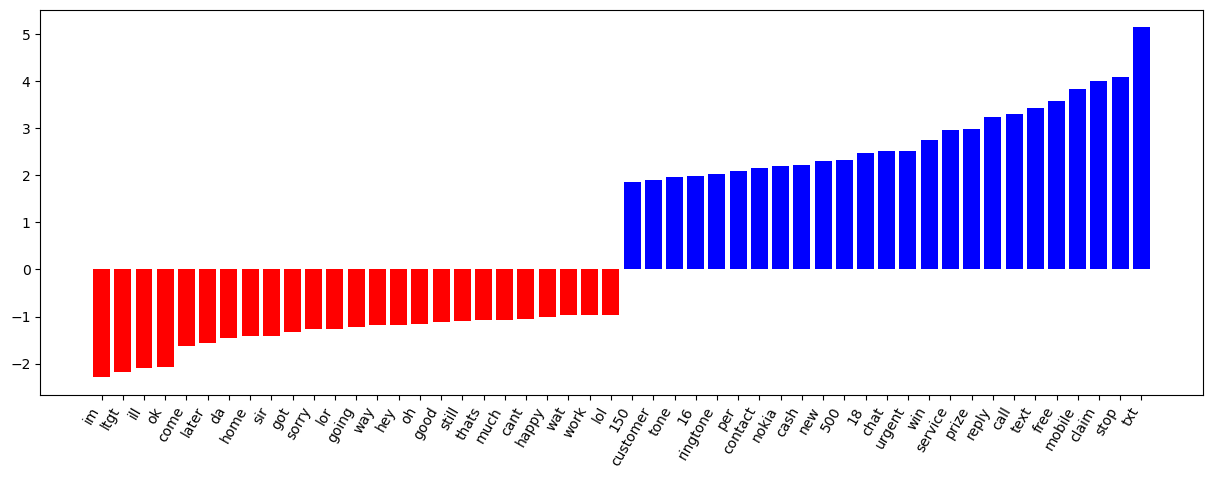

In [85]:
visualize_coefficients(clf, vectorizer.get_feature_names_out())    

### References Logistic Regression
- Introduction to Machine Learning with Python: A Guide for Data Scientists
- Instroduction to Statistical Learning